In [57]:
import pandas as panda
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import matplotlib.pyplot as plot
import seaborn as sea

nltk.download('stopwords')
result = panda.read_csv('results.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rubens.sousa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1. Escolha uma estratégia de tokenização para a coleção que você está usando e justifique sua estratégia. É importante que você inclua decisões adicionais em relação ao que foi feito no Laboratório anterior (por exemplo, tratamento de maiúsculas/minúsculas e strings numéricas)

In [58]:
palavras = []
palavras_filtradas = []

tokenz = RegexpTokenizer(r'([A-Za-zÁáÉéÍíÓóÚúÃãÕõÇçÂâÊê]{3,27})')
stopwords = nltk.corpus.stopwords.words('portuguese')

for texto in result.text:
   words = [palavra for palavra in tokenz.tokenize(texto.lower())
           if not bool(re.search(r'\d', palavra))]
   palavras.extend(words)

palavras_filtradas = [palavra for palavra in palavras if palavra not in stopwords and len(palavra) >= 3]

In [59]:
print("Sem a filtragem de stopwords:", len(palavras))
print("Com a filtragem de stopwords:", len(palavras_filtradas))

Sem a filtragem de stopwords: 28546
Com a filtragem de stopwords: 22343


Foi feita a estratégia em que tokenizamos o csv do lab 01 utilizando o tokenizador que foi disponibilizado pela lib nltk, por meio de um regex. Trata-se todas as palavras com letras minúsculas e remove-se as palavras sem muito contexto do conjunto stopwords.

### 2. Refaça a questão 2 do Laboratório anterior usando os tokens produzidos 

In [60]:
ocorrencia_total_palavras = len(palavras_filtradas)
frequencia_de_palavras = {}
frequencia_de_palavras = Counter(palavras_filtradas)

In [61]:
top_palavras = frequencia_de_palavras.most_common(50)

tabela_de_top_50 = panda.DataFrame(columns = ['Word', 'Frequency', 'r', 'Pr(%)', 'r.Pr'])

tabela_de_top_50['Word'] = [word[0] for word in top_palavras]
tabela_de_top_50['Frequency'] = [word[1] for word in top_palavras]
tabela_de_top_50['r'] = [rank+1 for rank in range(0, len(top_palavras))]
tabela_de_top_50['Pr(%)'] = [round((word[1] / ocorrencia_total_palavras)*100, 2) for word in top_palavras]
tabela_de_top_50['r.Pr'] = round((tabela_de_top_50['Pr(%)']/100)*tabela_de_top_50['r'], 3)

tabela = tabela_de_top_50.set_index('r')
tabela

,Word,Frequency,Pr(%),r.Pr
r,,,,
1,presidente,219,0.98,0.010
2,lula,197,0.88,0.018
3,bolsonaro,173,0.77,0.023
4,brasil,153,0.68,0.027
5,disse,128,0.57,0.028
6,governo,125,0.56,0.034
7,feira,86,0.38,0.027
8,ser,85,0.38,0.030
9,sobre,81,0.36,0.032


### 3. Aplique Stemming nos tokens produzidos e encontre 10 exemplos de falsos positivos e 10 exemplos de falsos negativos. Que impacto você acha que falsos positivos e negativos, como esses, teriam no processamento de consultas? Dê exemplos.

In [62]:
palavras_aumentadas = []
stemmer = nltk.stem.SnowballStemmer('portuguese')

palavras_aumentadas = [stemmer.stem(word) for word in palavras_filtradas]

set_stem = sorted(set(palavras_aumentadas))
set_words = sorted(set(palavras_filtradas))

print("Quantidade palavras distintas sem Stemming:",len(set_words))
print("Quantidade palavras distintas com Stemming:",len(set_stem))

Quantidade palavras distintas sem Stemming: 6609
Quantidade palavras distintas com Stemming: 4106


### 4. Refaça a questão 3 do Laboratório anterior usando os tokens stemizados. Você percebeu alguma diferença em relação aos tokens sem stemming? Se sim, quais?

In [63]:
total_hasteado_palavra_ocorridas = len(palavras_aumentadas)
frequencia_palavras_hasteadas = {}
frequencia_palavras_hasteadas = Counter(palavras_aumentadas)

top_palavras_hasteadas = frequencia_palavras_hasteadas.most_common(50)

tabela_top_50_hasteadas = panda.DataFrame(columns = ['Word', 'Frequency', 'r', 'Pr(%)', 'r.Pr'])

tabela_top_50_hasteadas['Word'] = [word[0] for word in top_palavras_hasteadas]
tabela_top_50_hasteadas['Frequency'] = [word[1] for word in top_palavras_hasteadas]
tabela_top_50_hasteadas['r'] = [rank+1 for rank in range(0, len(top_palavras_hasteadas))]
tabela_top_50_hasteadas['Pr(%)'] = [round((word[1] / total_hasteado_palavra_ocorridas)*100, 2) for word in top_palavras_hasteadas]
tabela_top_50_hasteadas['r.Pr'] = round((tabela_top_50_hasteadas['Pr(%)']/100)*tabela_top_50_hasteadas['r'], 3)

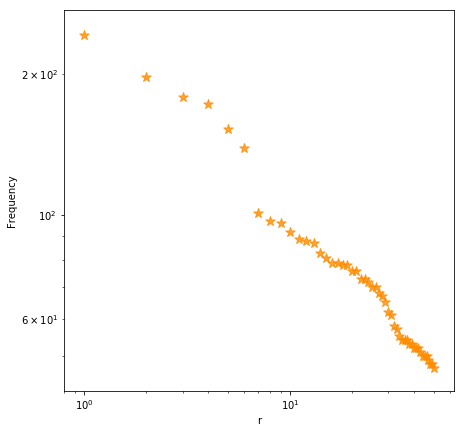

In [64]:
f, ax = plot.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sea.regplot("r", "Frequency", tabela_top_50_hasteadas, ax=ax, marker="*", scatter_kws={"s": 100}, fit_reg = False, color = '#FF8C00')

Por causa do agrupamento feito nas palavras a partir dos seus radicais, foi possível notar maior linearidade na disposição dos tokens no gráfico, em relação ao lab anterior.

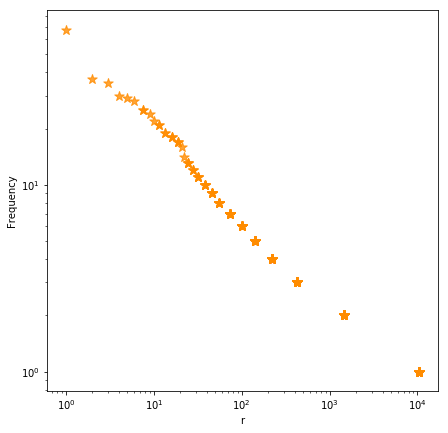

In [65]:
bigramas = []
bigramas = nltk.bigrams(palavras_aumentadas)
bigramas_frequencia = nltk.FreqDist(bigramas)
tabela_bigramas = panda.DataFrame(bigramas_frequencia.most_common(), columns=['word', 'Frequency'])
tabela_bigramas['r'] = tabela_bigramas['Frequency'].rank(ascending=False)

f, ax = plot.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sea.regplot("r", "Frequency", tabela_bigramas, ax=ax, marker="*", scatter_kws={"s": 100}, fit_reg = False, color = '#FF8C00')


Não se percebeu diferença significativa em relação ao lab anterior.